In [1]:
import pandas as pd

file_path = "/content/Data.csv"
data = pd.read_csv(file_path)
data.head(n=5)
print(f"Remaining rows: {data.shape[0]}")

null_check = data[['impactarea', 'genome', 'outcome', 'programdescription']].isnull().sum()
data['programdescription'] = data['programdescription'].str.lower()
data['genome'] = data['genome'].str.lower()
data['outcome'] = data['outcome'].str.lower()
print("Null Values Check:")
print(null_check)
print("\nData (after converting to lowercase):")
print(data[['programdescription','genome', 'outcome']].head())


Remaining rows: 6649
Null Values Check:
impactarea            200
genome                200
outcome               200
programdescription      7
dtype: int64

Data (after converting to lowercase):
                                  programdescription  \
0  the cultural alliance’s work falls into two pr...   
1  the unity performing arts programming is focus...   
2  chis&e  provides a rigorous  4 week  summer en...   
3  codepath.org offers a three-part program that ...   
4  the baltimore educational scholarship trust, i...   

                         genome                          outcome  
0            creative community  strengthened creative community  
1             youth development      social and emotional skills  
2                          stem                 stem proficiency  
3                          stem                 stem persistence  
4  college and career readiness           high school completion  


# New Section

In [2]:
data = data.dropna(subset=['programdescription', 'outcome'])

data['impactarea'] = data['impactarea'].fillna('unknown')
data['genome'] = data['genome'].fillna('unknown')

print(f"Remaining rows: {data.shape[0]}")

print("\nValue counts for impactarea:")
print(data['impactarea'].value_counts())


Remaining rows: 6442

Value counts for impactarea:
impactarea
Education                         1436
Economic Development              1205
Public Health                     1097
Critical Human Needs               999
Youth                              519
Systems Change                     393
Arts                               335
Global Development                 166
Sustainability and Environment     132
Culture and Identity                79
Science and Technology              62
Criminal Justice                    19
Name: count, dtype: int64


<ipython-input-2-167c2dd5701e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['impactarea'] = data['impactarea'].fillna('unknown')
<ipython-input-2-167c2dd5701e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['genome'] = data['genome'].fillna('unknown')


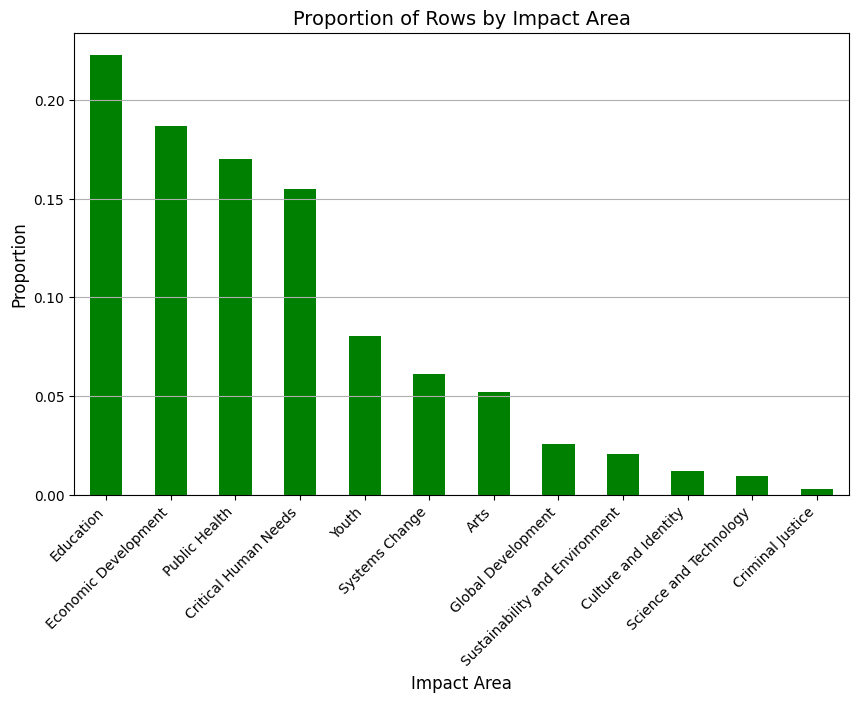

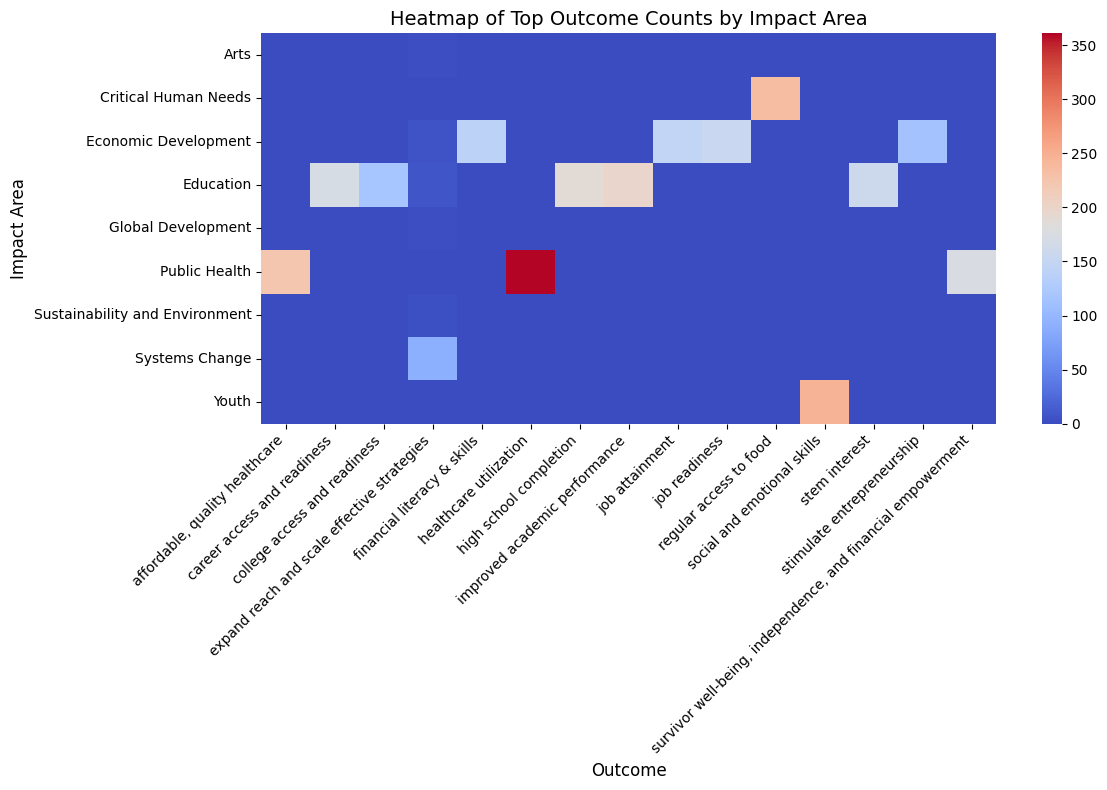

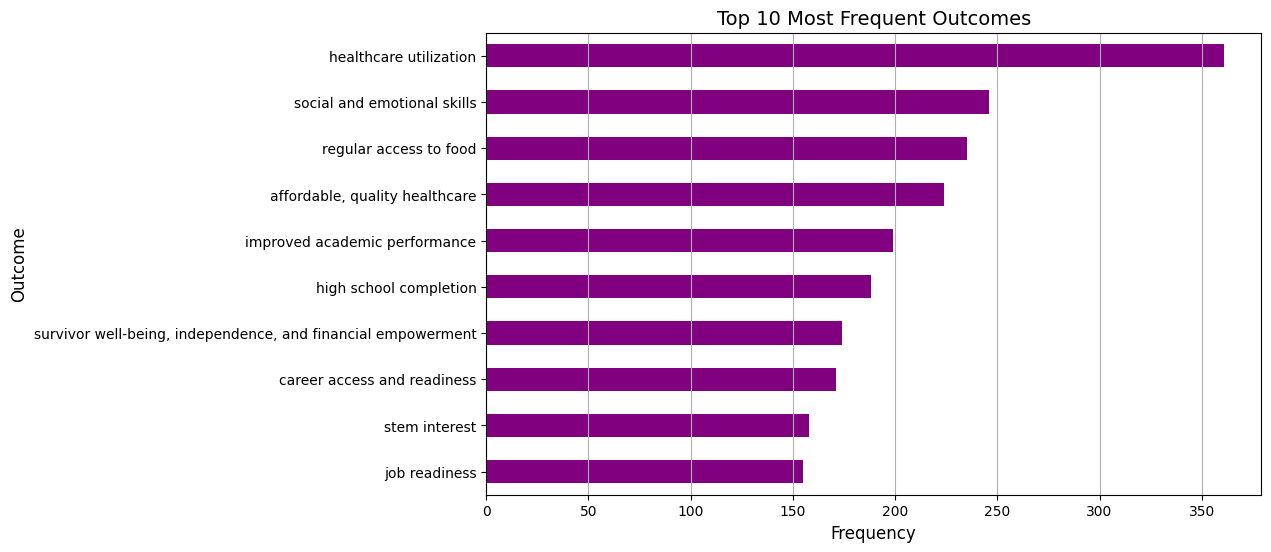

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
data['impactarea'].value_counts(normalize=True).plot(kind='bar', color='green')
plt.title('Proportion of Rows by Impact Area', fontsize=14)
plt.xlabel('Impact Area', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

top_outcomes = data['outcome'].value_counts().head(15).index
filtered_data = data[data['outcome'].isin(top_outcomes)]

pivot_table = filtered_data.pivot_table(index='impactarea', columns='outcome', aggfunc='size', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='coolwarm', cbar=True)
plt.title('Heatmap of Top Outcome Counts by Impact Area', fontsize=14)
plt.xlabel('Outcome', fontsize=12)
plt.ylabel('Impact Area', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
data['outcome'].value_counts().head(10).plot(kind='barh', color='purple')
plt.title('Top 10 Most Frequent Outcomes', fontsize=14)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Outcome', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()

